In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("D:\projects\classic learn\data_analysis\hr_dashboard_data.csv")

# Display the first few rows
df.head()


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10384\440930338.py:6: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\projects\classic learn\data_analysis\hr_dashboard_data.csv")


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [2]:
# Check for missing values
print(df.isnull().sum())

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64


In [11]:
# Convert categorical data into numerical format if needed
df['Department'] = df['Department'].astype('category').cat.codes  # Convert department names to numbers


# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

In [4]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [5]:
# Display dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    int8   
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), int8(1), object(4)
memory usage: 15.9+ KB
None


In [9]:
# Summary statistics
print(df.describe())

# Department-wise statistics
print(df.groupby('Department')['Salary'].mean())  # Average salary per department
print(df.groupby('Department')['Productivity (%)'].mean())  # Avg performance score per department


              Age  Projects Completed  Productivity (%)  \
count  200.000000          200.000000        200.000000   
mean    34.650000           11.455000         46.755000   
std      9.797318            6.408849         28.530068   
min     22.000000            0.000000          0.000000   
25%     26.000000            6.000000         23.000000   
50%     32.000000           11.000000         45.000000   
75%     41.000000           17.000000         70.000000   
max     60.000000           25.000000         98.000000   

       Satisfaction Rate (%)  Feedback Score  Department         Salary  
count             200.000000      200.000000  200.000000     200.000000  
mean               49.935000        2.883000    2.110000   76619.245000  
std                28.934353        1.123263    1.458953   27082.299202  
min                 0.000000        1.000000    0.000000   30231.000000  
25%                25.750000        1.900000    1.000000   53080.500000  
50%                50.50

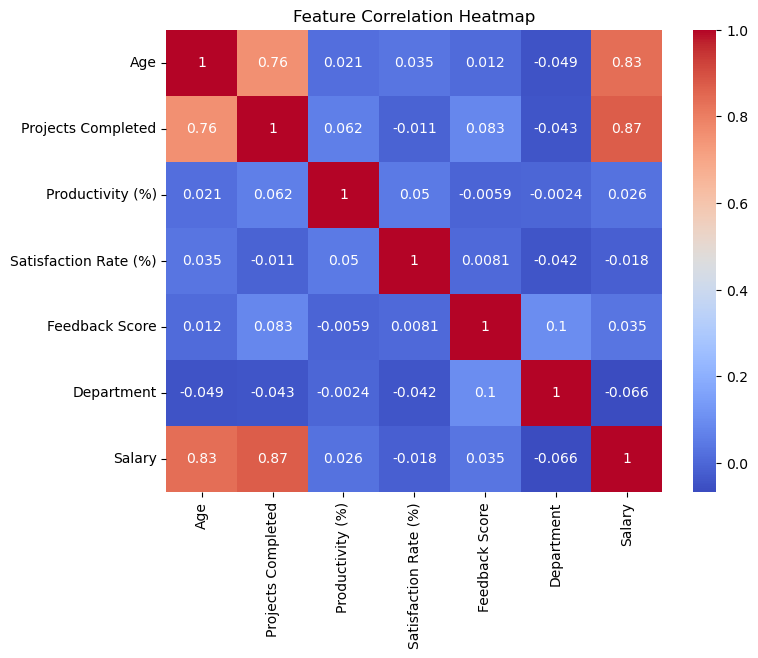

In [ ]:

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


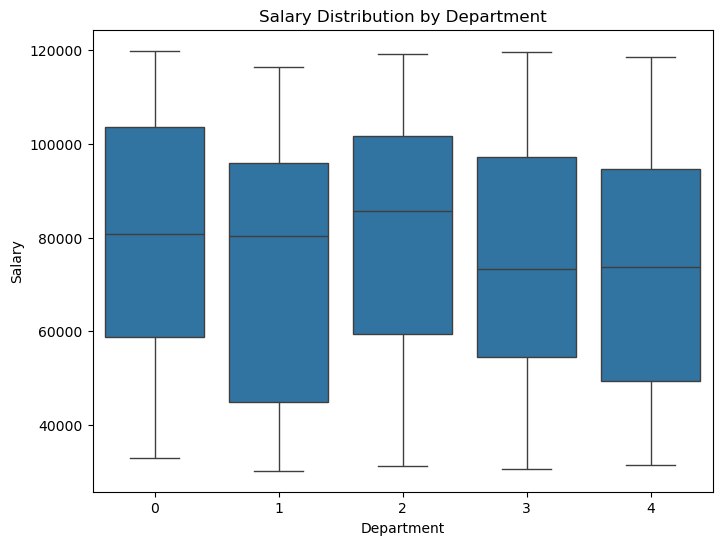

In [41]:
#Salary Distribution by Department

plt.figure(figsize=(8, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title("Salary Distribution by Department")

plt.show()

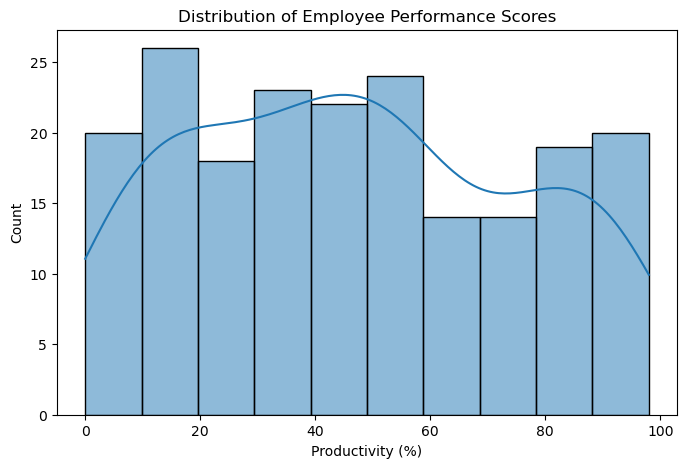

In [23]:
#Employee Performance Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Productivity (%)'], bins=10, kde=True)
plt.title("Distribution of Employee Performance Scores")
plt.show()


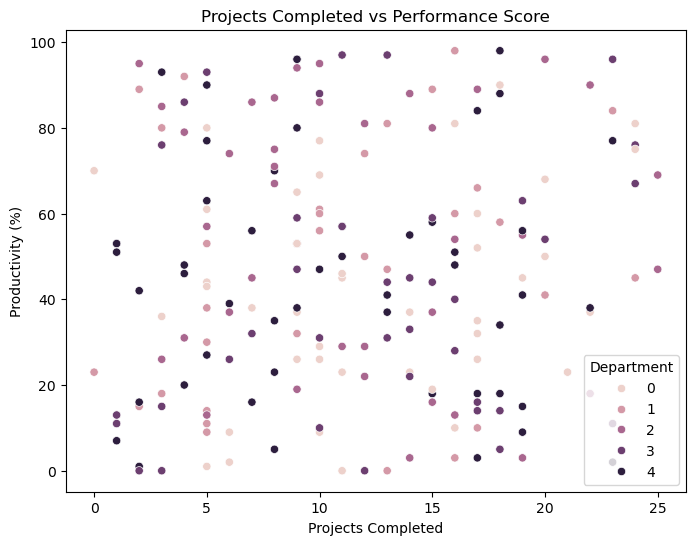

In [27]:
#Projects Completed vs Performance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Projects Completed', y='Productivity (%)', hue='Department', data=df)
plt.title("Projects Completed vs Performance Score")
plt.show()


**Evaluating Employee Performance**

In [28]:
#Top Performers by Department
top_performers = df.sort_values(by='Productivity (%)', ascending=False).groupby('Department').head(3)
print(top_performers[['Name', 'Department', 'Productivity (%)', 'Projects Completed']])


                   Name  Department  Productivity (%)  Projects Completed
160          Ryan Avila           4                98                  18
133     Patrick Manning           1                98                  16
176       Autumn Taylor           3                97                  11
173        Shannon Gray           3                97                  13
168       Yvette Hughes           4                96                   9
148         Cesar Davis           3                96                   9
75           John Moore           2                96                  20
194       Michael Baker           2                95                   2
32         Emily Palmer           2                95                  10
113  Danielle Rodriguez           4                93                   3
7         Shannon Allen           1                92                   4
190     Joseph Friedman           0                90                  18
152      Bethany Castro           1   

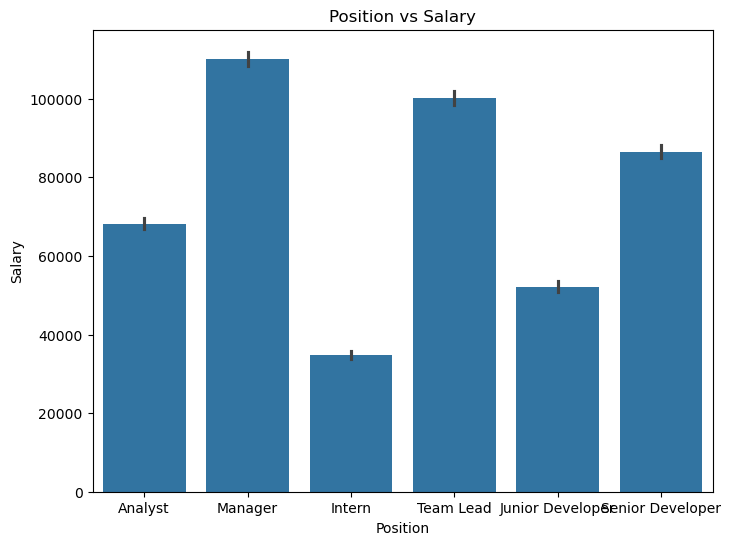

In [34]:
#Experience vs Salary

plt.figure(figsize=(8, 6))
sns.barplot(x='Position', y='Salary', data=df)
plt.title("Position vs Salary")
plt.show()
